In [ ]:
!pip install jsonformer

  Attempting uninstall: termcolor
    Found existing installation: termcolor 3.1.0
    Uninstalling termcolor-3.1.0:
      Successfully uninstalled termcolor-3.1.0


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

# Now provide the full path to your file in Google Drive
csv_file = "/content/drive/My Drive/expermintstarcoder/PuppetScripts_V2.csv"
csv_file_ansible = "/content/drive/My Drive/expermintstarcoder/merged_file_ansible_defect.csv"
df = pd.read_csv(csv_file)

Mounted at /content/drive


In [ ]:
!pip install transformers==4.48.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 74.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3


In [ ]:
!pip install torch==2.5.1 torchvision==0.20.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install transformers accelerate bitsandbytes

In [ ]:
from google.colab import drive
drive.mount(
   '/content/drive',
    force_remount=True,
)

Mounted at /content/drive


In [ ]:
from huggingface_hub import login
login(token="")

In [ ]:
#Finding misconfigurations in Puppet using LLaMA-3-3B

!pip install torch==2.5.1 torchvision==0.20.1


In [ ]:
#old prompt
import pandas as pd
import torch
import json
import csv
import sys
import gc
from jsonformer import Jsonformer
from transformers import AutoModelForCausalLM, AutoTokenizer
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define CSV file path in Google Drive
csv_file = "PuppetScripts_V2.csv"  # Input CSV file path
output_file = "PuppetScriptsLLama_results_new1.csv"  # Output CSV file path

# Load the CSV file from Google Drive
df = pd.read_csv(csv_file)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load model and tokenizer from Hugging Face model hub
model_name = "meta-llama/Llama-3.2-3B"  # Replace with the correct model name

print("Loading model from Hugging Face model hub...")
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)
print("Model loaded successfully!")

# Put model in evaluation mode
model.eval()

# Fix tokenizer pad token issue
tokenizer.pad_token = tokenizer.eos_token

# Define JSON Schema (Ensures long responses)
json_schema = {
    "type": "object",
    "properties": {
        "issues_found": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "misconfigured_snippet": {"type": "string"},
                    "related_cve": {"type": "string"},
                    "related_cwe": {"type": "string"},
                    "cve_url": {"type": "string"},
                    "cwe_url": {"type": "string"}
                }
            }
        },
        "misconfiguration_label": {"type": "string"}
    }
}

# Function to analyze Puppet misconfiguration
def analyze_misconfiguration(code_snippet):
    # Define structured prompt to include CVE and CWE URLs
    prompt = f"""
    You are a **security expert specializing in Puppet configuration security**. Your task is to analyze the following Puppet code and identify **all possible security risks**.

    **Puppet Script to Analyze**:
    ```puppet
    {code_snippet}
    ```

    ### **Response Format**
    Return the response in **valid JSON format**:
    ```json
    {{
      "issues_found": [
        {{
          "misconfigured_snippet": "<Describe the issue if critical and has CVE, otherwise 'N/A'>",
          "related_cve": "<CVE-ID if known, otherwise 'N/A'>",
          "related_cwe": "<CWE-ID if known, otherwise 'N/A'>",
          "cve_url": "https://cve.mitre.org/cgi-bin/cvename.cgi?name=<CVE-ID>",  # Only include if CVE exists
          "cwe_url": "https://cwe.mitre.org/data/definitions/<CWE-ID>.html"  # Only include if CWE exists
        }}
      ],
      "misconfiguration_label": 1  # Label '1' if there are critical issues, otherwise '0' for secure or minor issues
    }}
    ```

    ### **Instructions**
    - **Only report security risks**. Ignore syntax or general best practices.
    - If there are **multiple risks**, list **all** of them.
    - If the script **has no security misconfiguration**, return an **empty array** with `"misconfiguration_label": 0`.
    - Provide **CVE and CWE URLs** for identified risks if they are available.
    - **Return ONLY JSON** (without extra text or explanations).
    """

    max_length = min(len(tokenizer.encode(prompt)),2048)

    # Tokenize input and move to GPU (Allowing longer input)
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        max_length=max_length,
        truncation=True,
        padding="max_length"
    ).to(device)

    # Generate structured output using Jsonformer with high token limit
    with torch.no_grad():
        structured_output = Jsonformer(
            model,
            tokenizer,
            json_schema=json_schema,
            prompt=prompt,
            max_string_token_length=max_length,
        )

    return structured_output()

# Open CSV file and write header only once
with open(output_file, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Script", "Original_Defect_Label", "Misconfiguration_Label_llm", "MisconfigurationFound", "RelatedCVE", "RelatedCWE", "CVEURL", "CWEURL"])  # Updated header

# Process each row and save immediately after processing
for index, row in df.iterrows():
    script_content = str(row.get("Script.Content", "")).strip()
    defect_label = str(row.get("Defect.Label", "")).strip()

    if not script_content:
        print(f"Skipping Row {index + 1} (Empty Script)")
        continue

    try:
        # Analyze misconfiguration
        result = analyze_misconfiguration(script_content)
        torch.cuda.empty_cache()
        issues = result.get("issues_found", [])
        # Label generated by LLM
        misconfiguration_label_llm = result.get("misconfiguration_label", 0)
        # Convert multiple misconfigurations and reasons into a single comma-separated string
        misconfigured_snippets = ", ".join(sorted(set(issue.get("misconfigured_snippet", "Unknown") for issue in issues))) if issues else "No issues detected"
        cve_ids = ", ".join(sorted(set(issue.get("related_cve", "N/A") for issue in issues))) if issues else "None"
        cwe_ids = ", ".join(sorted(set(issue.get("related_cwe", "N/A") for issue in issues))) if issues else "None"
        cve_urls = ", ".join(sorted(set(issue.get("cve_url", "N/A") for issue in issues))) if issues else "None"
        cwe_urls = ", ".join(sorted(set(issue.get("cwe_url", "N/A") for issue in issues))) if issues else "None"

        # Save results directly into the CSV
        with open(output_file, mode="a", newline="", encoding="utf-8") as f:
            writer = csv.writer(f)
            writer.writerow([script_content,defect_label,misconfiguration_label_llm, misconfigured_snippets, cve_ids, cwe_ids, cve_urls, cwe_urls])

        # Print result
        print(f"\n🔹 **Processed Row {index + 1}/{len(df)}** 🔹\n")
        print(json.dumps(result, indent=4))
        sys.stdout.flush()
        result = issues = misconfiguration_label_llm = cve_ids = cwe_ids = cve_urls = cwe_urls = None
        gc.collect()

    except Exception as e:
        print(f"Error processing Row {index + 1}: {e}")

print("\n**All scripts analyzed successfully! Results saved in 'output_results.csv'**")



# Clear unused GPU memory (cache) and collect garbage
torch.cuda.empty_cache()
sys.exit()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Loading model from Hugging Face model hub...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model loaded successfully!


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Streaming output truncated to the last 5000 lines.
            "misconfigured_snippet": "RabbitMQ configuration file is vulnerable to CVE-2022-24997\\nRabbitMQ has an insecure default configuration that allows anyone to remotely connect and interact with the server.\\nThis can be exploited to perform remote code execution attacks or data exfiltration.",
            "related_cve": "CVE-2022-24997",
            "related_cwe": "CWE-79",
            "cve_url": "https://cve.mitre.org/cgi-bin/cvename.cgi?name=CVE-2022-24997",
            "cwe_url": "https://cwe.mitre.org/data/definitions/79.html"
        },
        {
            "misconfigured_snippet": "Database password is not encrypted.",
            "related_cve": "N/A",
            "related_cwe": "N/A",
            "cve_url": "N/A",
            "cwe_url": "N/A"
        },
        {
            "misconfigured_snippet": "No authentication strategy configured for the API endpoint.",
            "related_cve": "N/A",
            "related_cw

SystemExit: 

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load the model and tokenizer from Hugging Face (or from a local saved directory)
model_name = "meta-llama/Meta-Llama-3-8B"  # Replace with the correct model name
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Fix tokenizer pad token issue
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))
    tokenizer.pad_token = '[PAD]'

model.config.pad_token_id = tokenizer.pad_token_id  # Ensure pad_token_id is set

# Example input text
input_text = "Once upon a time"

# Tokenize input with attention mask
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Ensure the input is moved to the correct device (GPU/CPU)
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate output (fixing attention mask and pad token id issues)
with torch.no_grad():
    outputs = model.generate(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"], pad_token_id=model.config.pad_token_id)

# Decode the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Once upon a time, in the far away land of the United States of America, there lived a young man named John. He was a good man, and he worked hard, and he loved his family. He was also a little bit of a nerd, and he loved to play video games. One day, John was playing a video game when he came across a glitch. This glitch allowed him to do something that was not supposed to be possible in the game. John was very excited, and he decided to share his discovery with his friends. His friends were also very excited, and they started to play the game in a way that was not supposed to be possible. They were having a lot of fun, and they were getting better and better at the game. One day, John’s friends decided to share their discovery with other people. They started to tell people about the glitch, and they started to teach people how to use it. Soon, the glitch became very popular, and people all over the world were using it to play the game in a way that was not supposed to be possible. Joh

In [ ]:
#satrt for firt propt for missing rows

In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
def run_llama_analysis(
    csv_input_path: str,
    csv_output_path: str,
    model_name: str = "meta-llama/Meta-Llama-3-8B"
):
    import pandas as pd
    import torch
    import json
    import csv
    import gc
    import sys
    from transformers import AutoModelForCausalLM, AutoTokenizer
    from jsonformer import Jsonformer

    # Mount Google Drive
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load CSV
    df = pd.read_csv(csv_input_path)
    df.columns = df.columns.str.replace('.', '_')
    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    tokenizer.add_eos_token = True
    if '<pad>' not in tokenizer.get_vocab():
        tokenizer.add_special_tokens({"pad_token": "<pad>"})
    model.resize_token_embeddings(len(tokenizer))
    model.config.pad_token_id = tokenizer.pad_token_id

    if tokenizer.eos_token is None:
        tokenizer.eos_token = "[EOS]"

    # Define JSON Schema
    json_schema = {
        "type": "object",
        "properties": {
            "issues_found": {
                "type": "array",
                "items": {
                    "type": "object",
                    "properties": {
                        "misconfigured_snippet": {"type": "string"},
                        "related_cwe": {"type": "string"},
                    }
                }
            },
            "misconfiguration_label": {"type": "string"}
        }
    }

    def analyze_misconfiguration(code_snippet):
        prompt = f"""
        You are a security expert specializing in Puppet configuration security.
        Your task is to analyze the following Puppet code and identify only critical security misconfigurations issues that could lead to vulnerabilities and have a real CWE ID.
        Focus only on the available code and avoid making assumptions about unavailable details
        Puppet Script to Analyze:
        ```puppet
        {code_snippet}
        ```

        Response Format:
        Return the response in **valid JSON format**:

        - If there are critical issues provide unique misconfigured code:
        ```json
        {{
          "issues_found": [
            {{
              "misconfigured_snippet": "<actual misconfigured code snippet>",
              "related_cwe": "<CWE-ID>"
            }}
          ],
          "misconfiguration_label": 1
        }}
        ```

        - If there are NO critical issues:
        ```json
        {{
          "issues_found": [],
          "misconfiguration_label": 0
        }}
        ```

        Instructions:
        - Only list real misconfigurations tied to known CWE IDs.
        - **Do NOT** insert `"N/A"` entries into `issues_found`.
        - Do not include syntax errors
        - If no critical misconfiguration is found, the `issues_found` array must be completely empty `[]`.
        - If no critical misconfiguration is found, set `"misconfiguration_label": 0`.
        """
        with torch.no_grad():
            structured_output = Jsonformer(
                model,
                tokenizer,
                json_schema=json_schema,
                prompt=prompt,
                max_string_token_length=200
            )
            return structured_output()

    # Open CSV output file
    with open(csv_output_path, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(["Script", "Original_Defect_Label", "Misconfiguration_Label_llm", "MisconfigurationFound", "RelatedCWE"])

        for index, row in enumerate(df.itertuples(index=False)):
            script_content = str(getattr(row, 'Script_Content', '')).strip()
            defect_label = str(getattr(row, 'Defect_Label', '')).strip()

            if not script_content:
                print(f"⏭️ Skipping Row {index + 1} (Empty Script)")
                continue

            try:
                result = analyze_misconfiguration(script_content)
                torch.cuda.empty_cache()

                issues_found = result.get("issues_found", [])
                snippet_set = set()
                cwe_set = set()

                for issue in issues_found:
                    snippet_set.add(issue.get("misconfigured_snippet", "Unknown").strip())
                    cwe_set.add(issue.get("related_cwe", "N/A").strip())

                misconfiguration_label_llm = result.get("misconfiguration_label", 0)
                misconfigured_snippets = ", ".join(sorted(snippet_set)) if snippet_set else "No issues detected"
                cwe_ids = ", ".join(sorted(cwe_set)) if cwe_set else "None"

                writer.writerow([
                    script_content,
                    defect_label,
                    misconfiguration_label_llm,
                    misconfigured_snippets,
                    cwe_ids
                ])

                print(f"\n🔹 Processed Row {index + 1}/{len(df)} 🔹")
                print(json.dumps(result, indent=4))
                sys.stdout.flush()

                result = issues_found = misconfiguration_label_llm = cwe_ids = snippet_set = cwe_set = None
                del row
                gc.collect()
                torch.cuda.empty_cache()

            except Exception as e:
                print(f"❌ Error processing Row {index + 1}: {e}")

    print("\n✅ All scripts analyzed successfully! Results saved as CSV.")

In [ ]:
# Doing the missing rows

In [ ]:
run_llama_analysis(
    csv_input_path="/missing_scripts_final.csv",
    csv_output_path="/puppet_Llama_before_agent_part2.csv"
)

Loading model...


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/177 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Streaming output truncated to the last 5000 lines.
        },
        {
            "misconfigured_snippet": "file { 'c:/program files (x86)/microsoft visual studio 10.0/vc/bin/amd64/cvtres.exe' : ensure => file, source =>",
            "related_cwe": "CWE-22"
        },
        {
            "misconfigured_snippet": "file { 'c:/tools/vs2013' : ensure => link, target =>",
            "related_cwe": "CWE-22"
        },
        {
            "misconfigured_snippet": "tweaks::vs_2013_lnk {",
            "related_cwe": "CWE-22"
        }
    ],
    "misconfiguration_label": "1"
}

🔹 Processed Row 532/637 🔹
{
    "issues_found": [
        {
            "misconfigured_snippet": "class contrail { $settings = hiera('contrail', {}) $plugin_version = '3.0' $distribution = 'juniper' $network_scheme = hiera_hash('network_scheme', {}) $network_metadata = hiera_hash('network_metadata', {}) $uid = hiera('uid') $master_ip = hiera('master_ip') $node_name = hiera('user_node_name') $nodes = hiera('nodes'

In [ ]:
import json
import csv
import pandas as pd
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from jsonformer import Jsonformer

# ===============================
# Load Model and Tokenizer Once
# ===============================
def load_model_and_tokenizer(model_name="meta-llama/Meta-Llama-3-8B"):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4"
    )

    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="auto",
        quantization_config=bnb_config
    )

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenizer.add_eos_token = True

    if "<pad>" not in tokenizer.get_vocab():
        tokenizer.add_special_tokens({"pad_token": "<pad>"})

    model.resize_token_embeddings(len(tokenizer))
    model.config.pad_token_id = tokenizer.pad_token_id
    model.eval()

    if tokenizer.eos_token is None:
        tokenizer.eos_token = "[EOS]"

    return model, tokenizer, device

# ===============================
# JSON Schema
# ===============================
json_schema = {
    "type": "object",
    "properties": {
        "reason": {"type": "string"},
        "related_cwe": {"type": "string"},
        "is_misconfiguration_related": {"type": "string", "enum": ["Yes", "No"]}
    },
    "required": ["reason", "related_cwe", "is_misconfiguration_related"]
}

# ===============================
# Generate Analysis Function
# ===============================
def generate_analysis(model, tokenizer, device, script, original_defect_label, misconfig_label_llm, misconfig, cwe, row_number, temperature=0.7, max_input_length=2500, max_output_length=150):
    prompt = (
        f"Given the following script and misconfiguration details, evaluate whether the misconfiguration is related to the provided CWE. "
        f"Be specific in your analysis, linking security issues in the script to the corresponding vulnerabilities described by the CWE.\n\n"

        f"Row Number: {row_number}\n\n"
        f"Script:\n```puppet\n{script}\n```\n\n"
        f"Original Defect Label: `{original_defect_label}`\n\n"
        f"Misconfiguration Label LLM: `{misconfig_label_llm}`\n\n"
        f"Misconfiguration Found:\n```text\n{misconfig}\n```\n\n"
        f"Related CWE: `{cwe}`\n\n"

        f"Please **return only one of the following JSON responses**, based on whether the misconfiguration is related to the CWE:\n\n"

        f"If the misconfiguration **is related** to the CWE:\n"
        f"```json\n"
        f"{{\n"
        f"  \"reason\": \"[Provide the detailed reasoning explaining why the misconfiguration is related to the CWE]\",\n"
        f"  \"related_cwe\": \"[CWE number(s) related to the issue]\",\n"
        f"  \"is_misconfiguration_related\": \"Yes\"\n"
        f"}}\n"
        f"```\n\n"

        f"If the misconfiguration **is NOT related** to the CWE:\n"
        f"```json\n"
        f"{{\n"
        f"  \"reason\": \"[Explain why the misconfiguration is not related to the provided CWE]\",\n"
        f"  \"related_cwe\": \"None\",\n"
        f"  \"is_misconfiguration_related\": \"No\"\n"
        f"}}\n"
        f"```\n\n"

        f"Do **not** include any explanations or extra text outside of the JSON block."
    )

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=max_input_length, padding="max_length").to(device)

    structured_output = Jsonformer(
        model=model,
        tokenizer=tokenizer,
        json_schema=json_schema,
        prompt=prompt,
        max_string_token_length=150,
    )

    return structured_output()

# ===============================
# CSV Processor Function
# ===============================
def process_csv(model, tokenizer, device, input_file, output_file):
    df = pd.read_csv(input_file)

    with open(output_file, 'w', newline='', encoding='utf-8') as f_out:
        writer = csv.writer(f_out)
        writer.writerow([
            "Row_Number", "Script", "Original_Defect_Label", "Misconfiguration_Label_llm",
            "MisconfigurationFound", "RelatedCWE", "Reason", "Related_CWE_Output", "Is_Misconfiguration_Related"
        ])

        for index, row in df.iterrows():
            script = row['Script']
            original_defect_label = row['Original_Defect_Label']
            misconfig_label_llm = row['Misconfiguration_Label_llm']
            misconfig = row['MisconfigurationFound']
            cwe = row['RelatedCWE']

            try:
                result = generate_analysis(
                    model, tokenizer, device,
                    script, original_defect_label, misconfig_label_llm,
                    misconfig, cwe,
                    row_number=index + 1
                )

                writer.writerow([
                    index + 1, script, original_defect_label, misconfig_label_llm,
                    misconfig, cwe,
                    result.get("reason", "N/A"),
                    result.get("related_cwe", "N/A"),
                    result.get("is_misconfiguration_related", "N/A")
                ])
                print(f"Generated Reason for Row {index + 1}")
                print(f"Reason: {result}\n")

            except Exception as e:
                print(f"[!] Error on row {index + 1}: {e}")
                writer.writerow([
                    index + 1, script, original_defect_label, misconfig_label_llm,
                    misconfig, cwe,
                    f"Error: {e}", "None", "No"
                ])

In [ ]:
# Load once
model, tokenizer, device = load_model_and_tokenizer()

# Call many times
process_csv(
    model,
    tokenizer,
    device,
    input_file="/content/drive/MyDrive/expermintstarcoder/puppet_Llama_before_agent_part2.csv",
    output_file="/content/drive/My Drive/expermintstarcoder/puppet_Llama_after_agent_part2.csv"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


Generated Reason for Row 1
Reason: {'reason': 'the files should not exist when using the service class because the default service file name can cause the service to fail', 'related_cwe': 'CWE-250', 'is_misconfiguration_related': 'Yes'}

Generated Reason for Row 2
Reason: {'reason': 'None', 'related_cwe': 'None', 'is_misconfiguration_related': 'No'}



Accuracy             : 0.5095
Precision            : 0.5066
Recall               : 0.9816
F1-Score             : 0.6683
ROC AUC              : 0.5063
Precision-Recall AUC : 0.7487


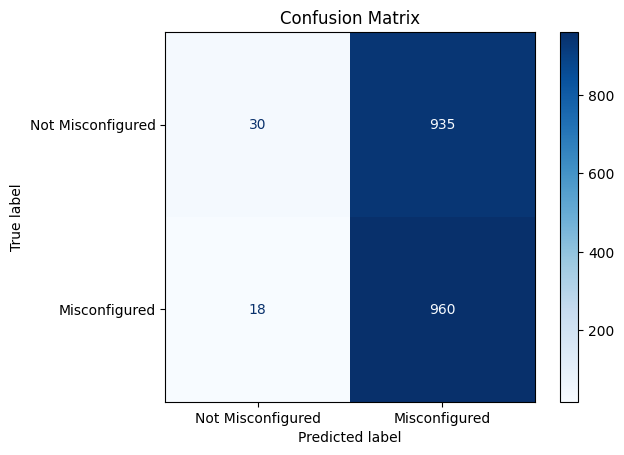

In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    precision_recall_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Puppet-llama_new_maping_verf.csv")

# Step 1: Clean and convert the ground truth (verification)
df['verification'] = pd.to_numeric(df['verification'], errors='coerce')

# Step 2: Clean and map the predictions (Misconfiguration_Label_llm)
df['Misconfiguration_Label_llm'] = df['Misconfiguration_Label_llm'].astype(str).str.strip().str.lower()
label_map = {'yes': 1, 'true': 1, '1': 1, 'no': 0, 'false': 0, '0': 0}
df['Misconfiguration_Label_llm'] = df['Misconfiguration_Label_llm'].map(label_map)

# Step 3: Drop rows with missing values
df = df.dropna(subset=['verification', 'Misconfiguration_Label_llm'])

# Step 4: Final labels
true_labels = df['verification'].astype(int)                   # ✅ ground truth
predicted_labels = df['Misconfiguration_Label_llm'].astype(int)  # 🤖 model prediction

# Step 5: Compute metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, predicted_labels, average='binary', pos_label=1, zero_division=0
)

try:
    roc_auc = roc_auc_score(true_labels, predicted_labels)
except ValueError:
    roc_auc = None

precision_vals, recall_vals, _ = precision_recall_curve(true_labels, predicted_labels)
pr_auc = auc(recall_vals, precision_vals)

# Step 6: Print results
print(f"Accuracy             : {accuracy:.4f}")
print(f"Precision            : {precision:.4f}")  # How many predicted misconfigs were correct
print(f"Recall               : {recall:.4f}")     # How many real misconfigs were caught
print(f"F1-Score             : {f1:.4f}")
print(f"ROC AUC              : {roc_auc:.4f}" if roc_auc is not None else "ROC AUC              : Undefined")
print(f"Precision-Recall AUC : {pr_auc:.4f}")

# Step 7: Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Misconfigured", "Misconfigured"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

